<a href="https://colab.research.google.com/github/Rushikesh3005/Mobile-price-range-prediction/blob/main/mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name:-Mobile price Range Prediction





#Problem Statement

###**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.**
###**The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**


#**Data Description -**


**Battery_power -** Total energy a battery can store in one time measured in mAh

**Blue -** Has bluetooth or not

**Clock_speed -** speed at which microprocessor executes instructions

**Dual_sim -** Has dual sim support or not

**Fc -** Front Camera mega pixels

**Four_g -** Has 4G or not

**Int_memory -** Internal Memory in Gigabytes

**M_dep -** Mobile Depth in cm

**Mobile_wt -** Weight of mobile phone

**N_cores -** Number of cores of processor

**Pc -** Primary Camera mega pixels

**Px_height -** Pixel Resolution Height

**Px_width -** Pixel Resolution Width

**Ram -** Random Access Memory in Mega Bytes

**Sc_h -** Screen Height of mobile in cm

**Sc_w -** Screen Width of mobile in cm

**Talk_time -** longest time that a single battery charge will last when you are

**Three_g -** Has 3G or not

**Touch_screen -** Has touch screen or not

**Wifi -** Has wifi or not

**Price_range -** This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# mounting  drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of data_mobile_price_range.csv')

In [5]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
df['sc_w']=df['sc_w'].replace(0,4.356398) #Replace zero screen width by its mean value

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,6.159076,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.001103,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#Checking null values in dataset

In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#Checking class values are balanced or not

In [10]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

#Data Visualization

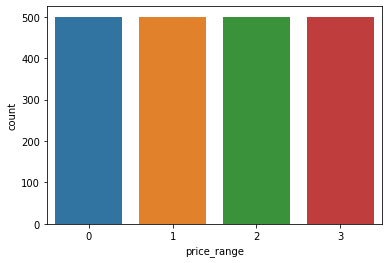

In [11]:
#Count of values for Price range
sns.countplot(x="price_range", data=df)

In [12]:
keys = [i  for i in df.columns]
values = [df[i].nunique() for i in keys]
dt = pd.DataFrame()
dt['features'] = keys
dt['nunique'] = values
dt

,features,nunique
0,battery_power,1094
1,blue,2
2,clock_speed,26
3,dual_sim,2
4,fc,20
5,four_g,2
6,int_memory,63
7,m_dep,10
8,mobile_wt,121
9,n_cores,8


#Correlation

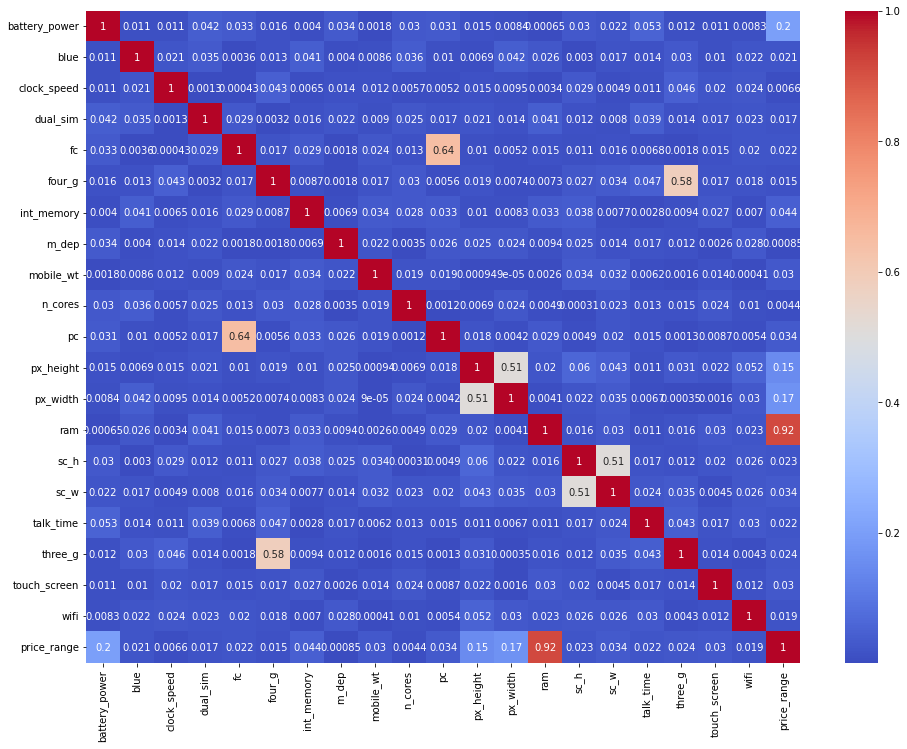

In [13]:
 ## Correlation
plt.figure(figsize=(16,12))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##Distribution of features 

In [14]:
numeric_features = ['battery_power','clock_speed','m_dep','mobile_wt','n_cores','px_height','px_width','ram','fc','int_memory','pc','sc_h','sc_w','talk_time']
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

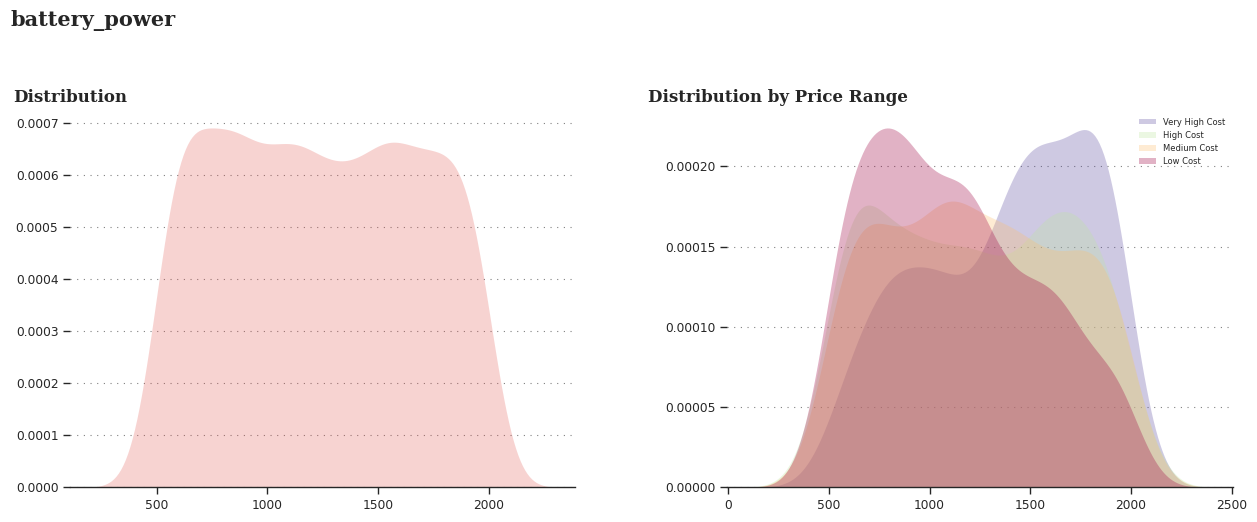

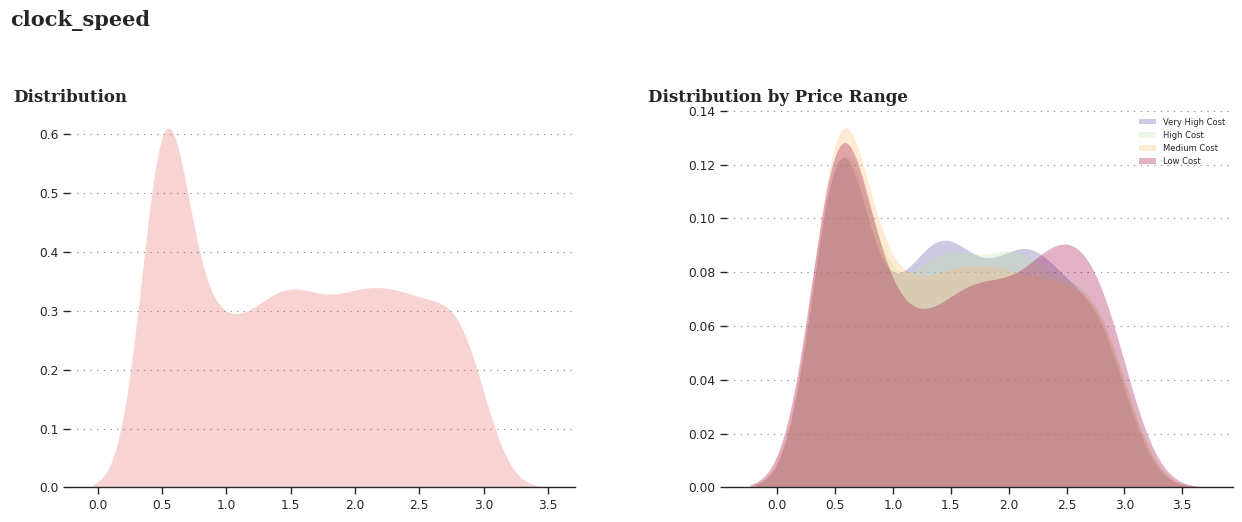

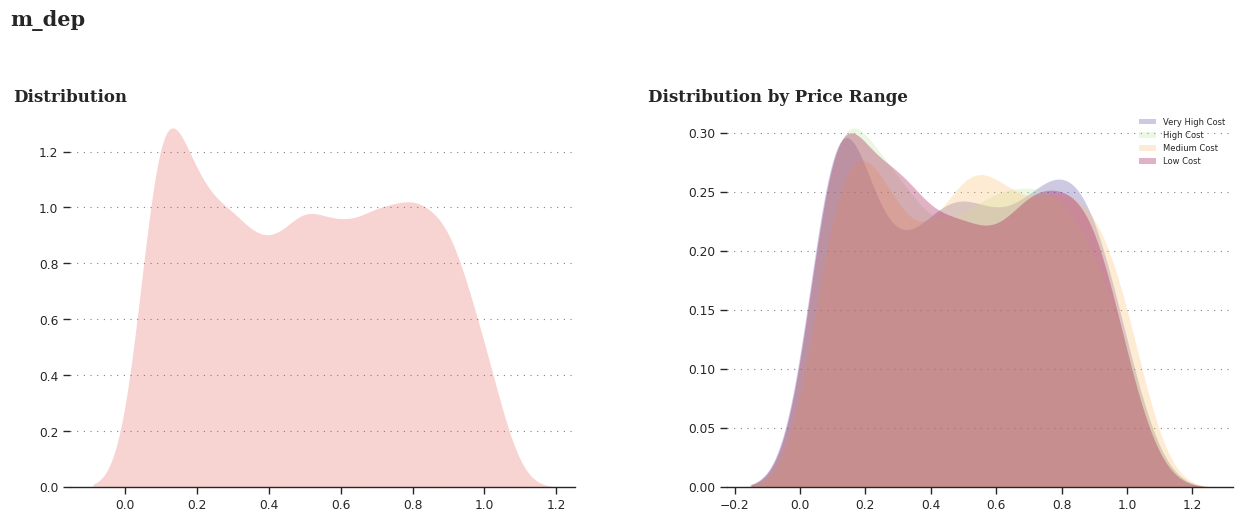

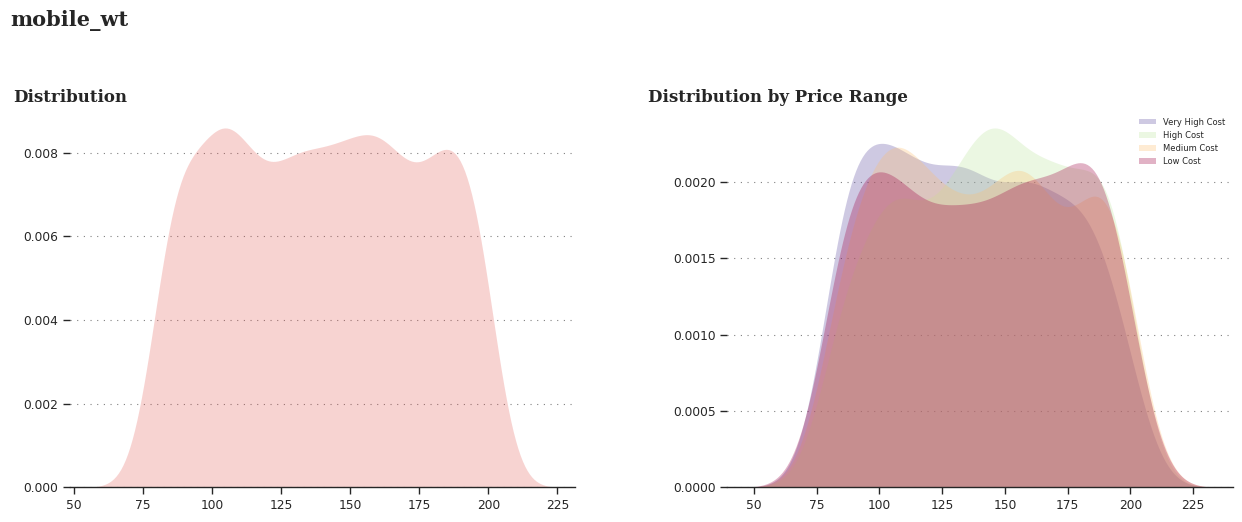

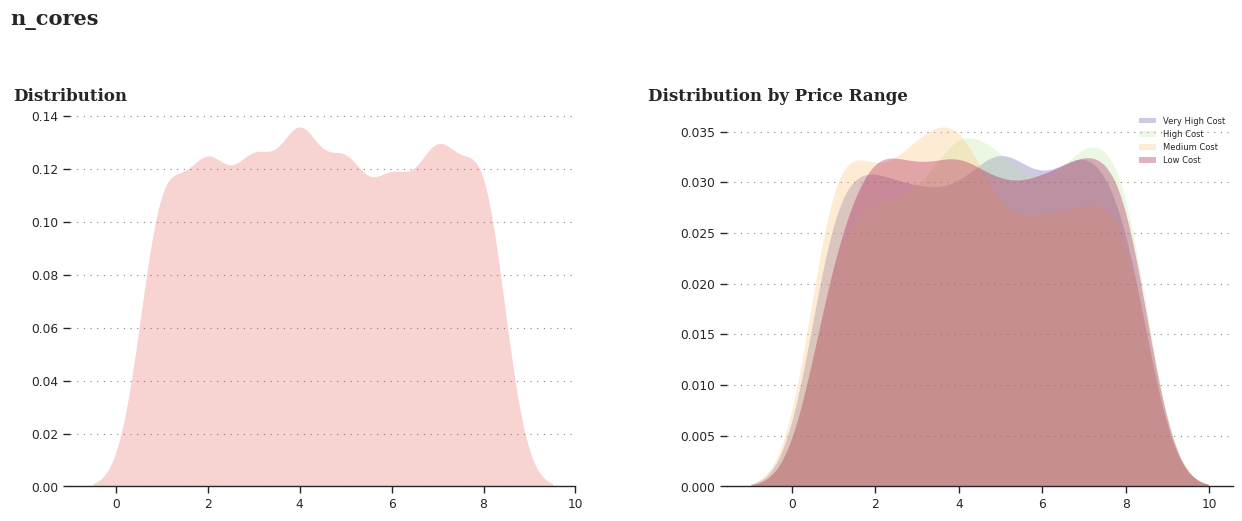

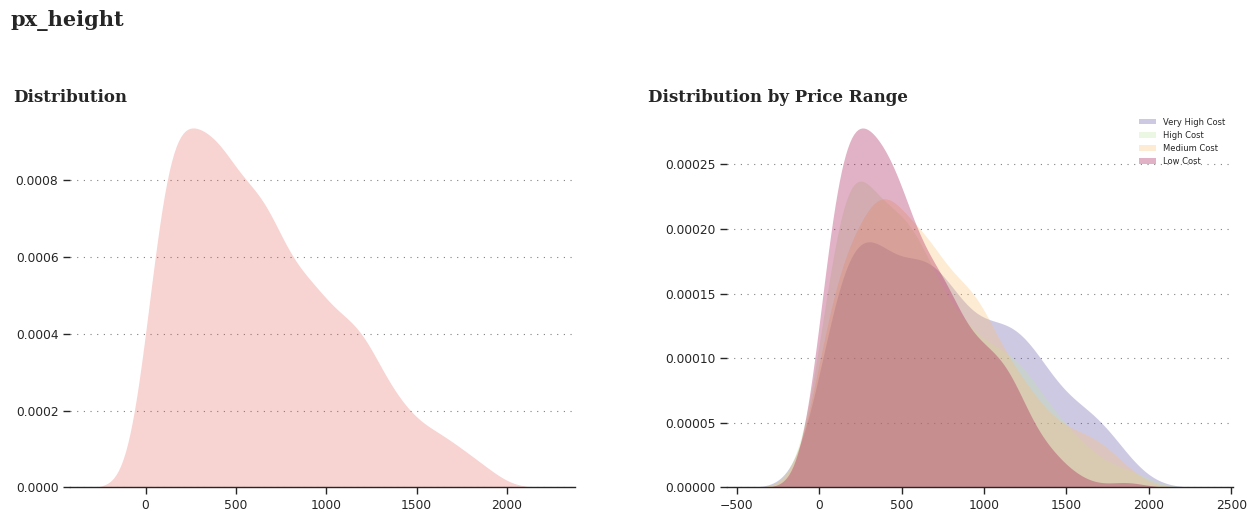

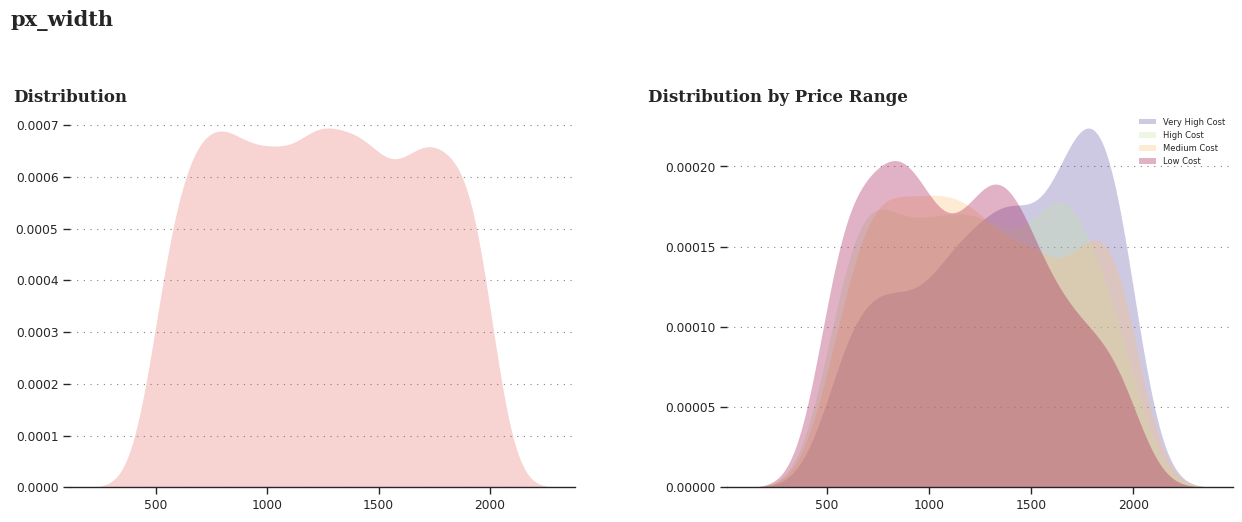

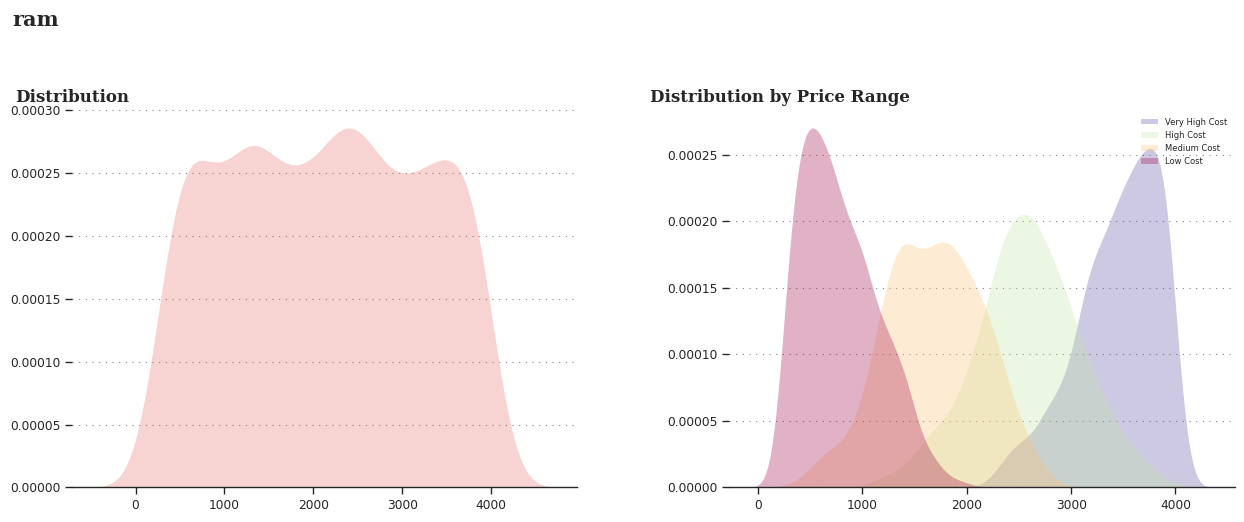

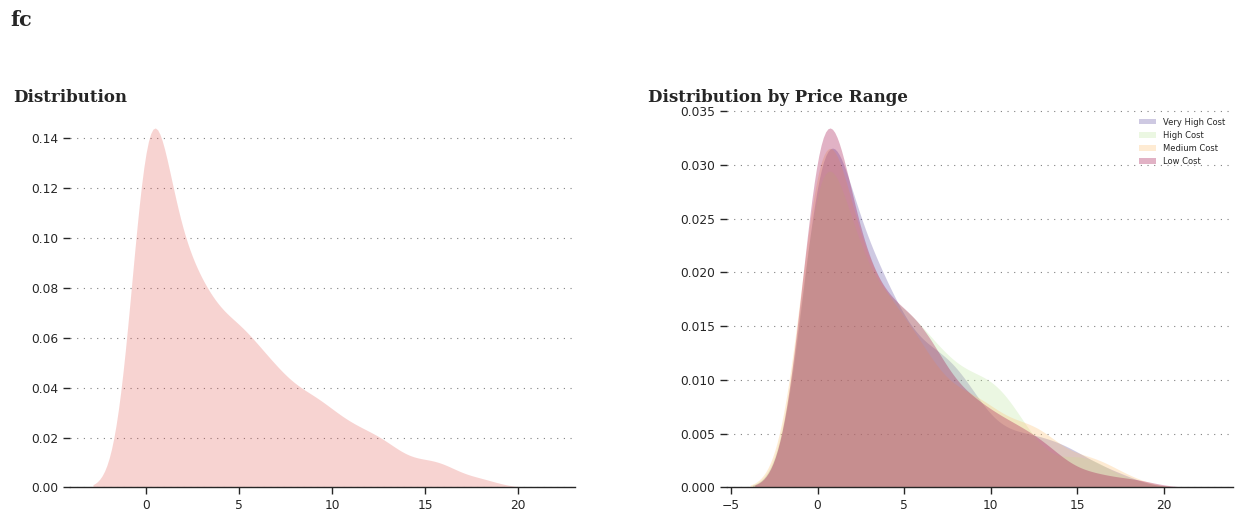

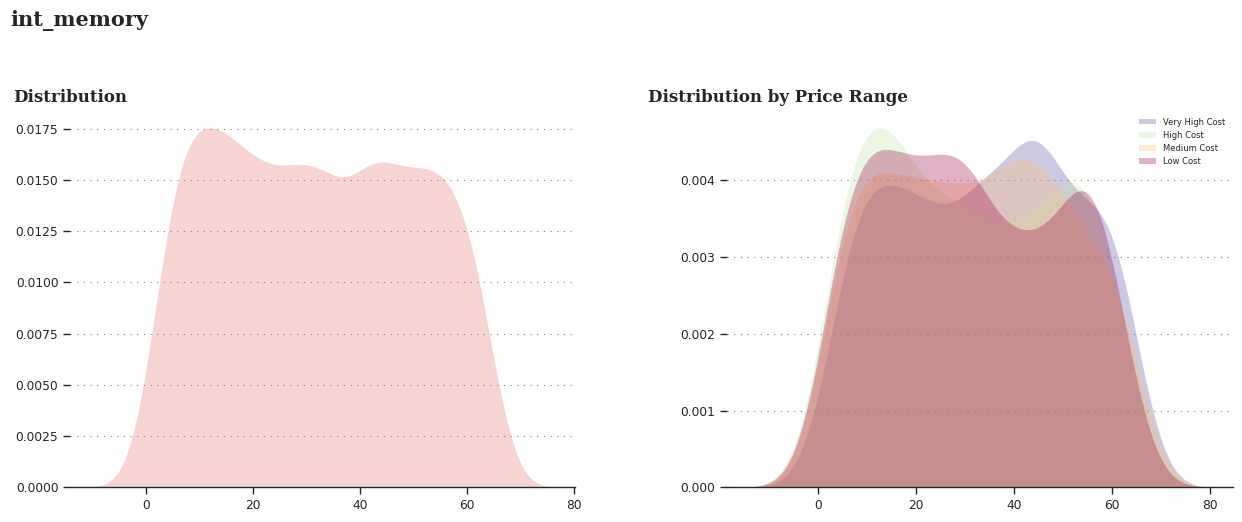

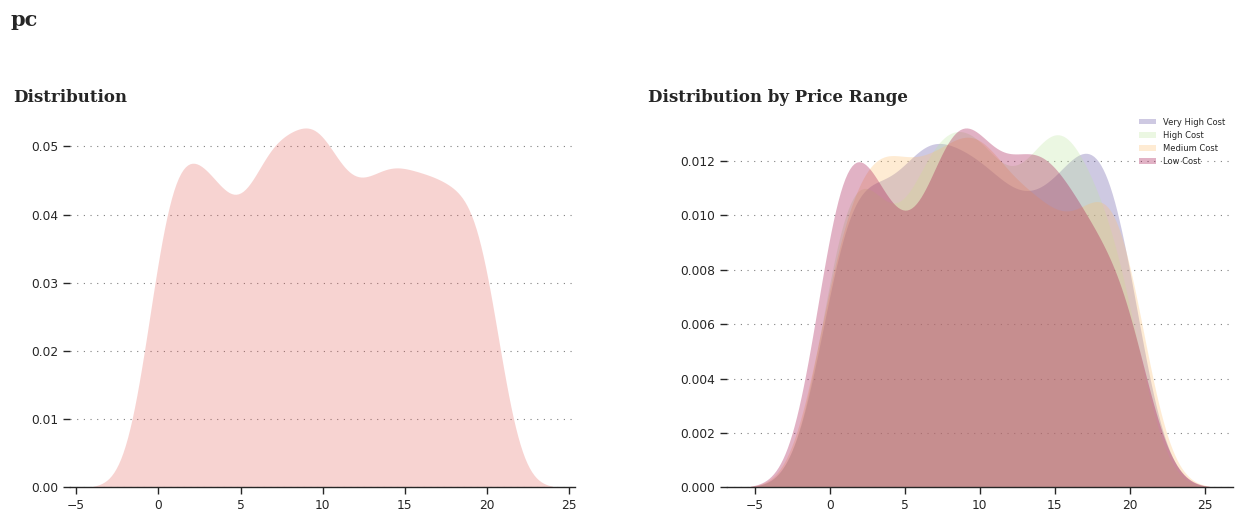

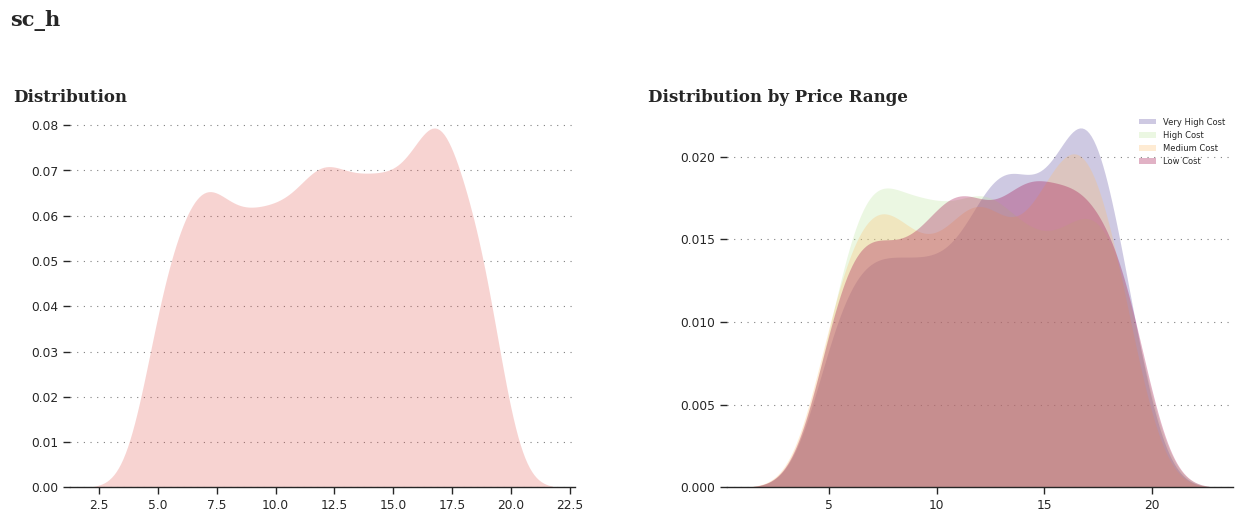

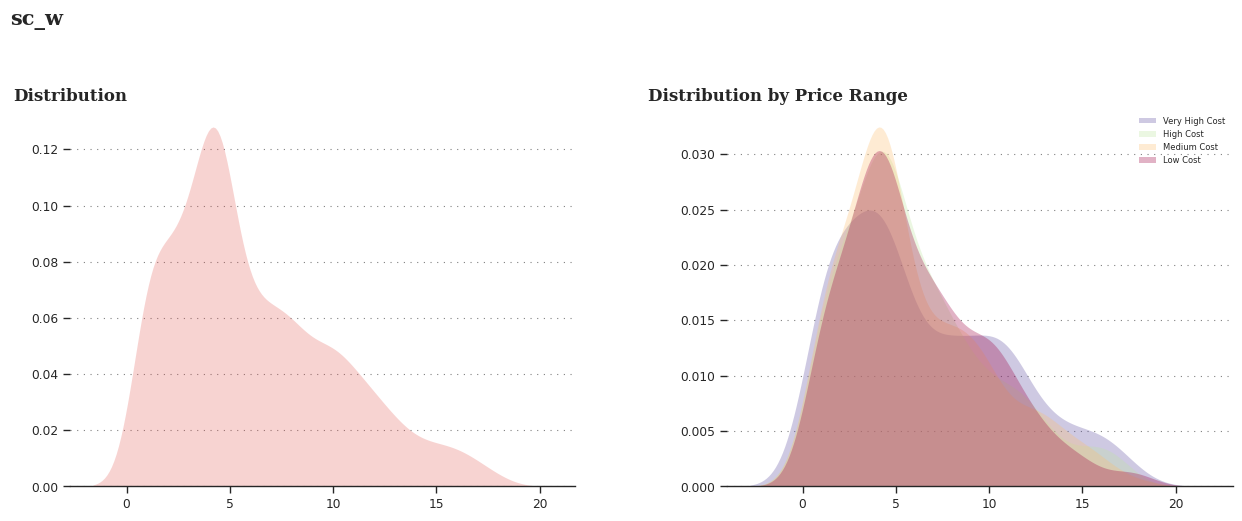

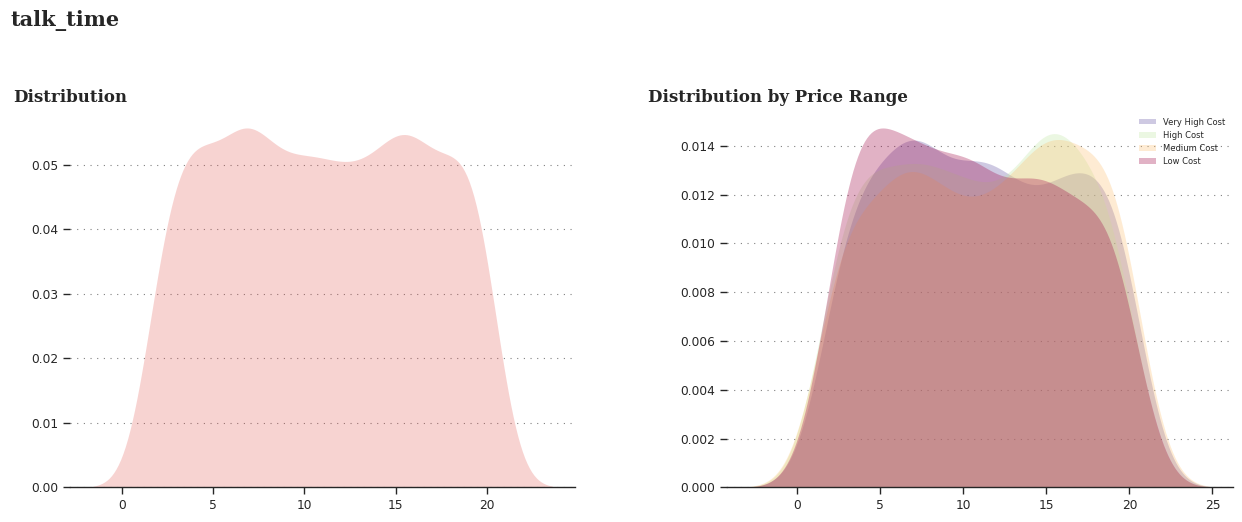

In [15]:
for i in numeric_features:
  sns.set(rc={"figure.dpi":100})
  sns.set_context('paper')
  sns.set_style("ticks")

  fig = plt.figure(figsize=(15,12))
  gs = fig.add_gridspec(2, 2)
  gs.update(wspace=0.3, hspace=0.4)
  fig.text(0.085,0.95,i, fontfamily='serif',fontsize=15, fontweight='bold')
  sns.set_palette('Spectral')

  ax0 = fig.add_subplot(gs[0, 0])
  ax1 = fig.add_subplot(gs[0, 1])
 
#Axis 0 

  ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  sns.kdeplot(x=i,
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )

  ax0.set_xlabel("")
  ax0.set_ylabel("")
  ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1)
  ax0.spines['top'].set_visible(False)
  ax0.spines['right'].set_visible(False)
  ax0.spines['left'].set_visible(False)


  #Axis 1 

  ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  sns.kdeplot(x=i,
           hue='price_range',
           shade=True,
           data=df,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )

  ax1.set_xlabel("")
  ax1.set_ylabel("")
  ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
  ax1.legend(['Very High Cost','High Cost','Medium Cost','Low Cost '],fontsize=6,frameon=False)
  ax1.spines['top'].set_visible(False)
  ax1.spines['right'].set_visible(False)
  ax1.spines['left'].set_visible(False)

    
 

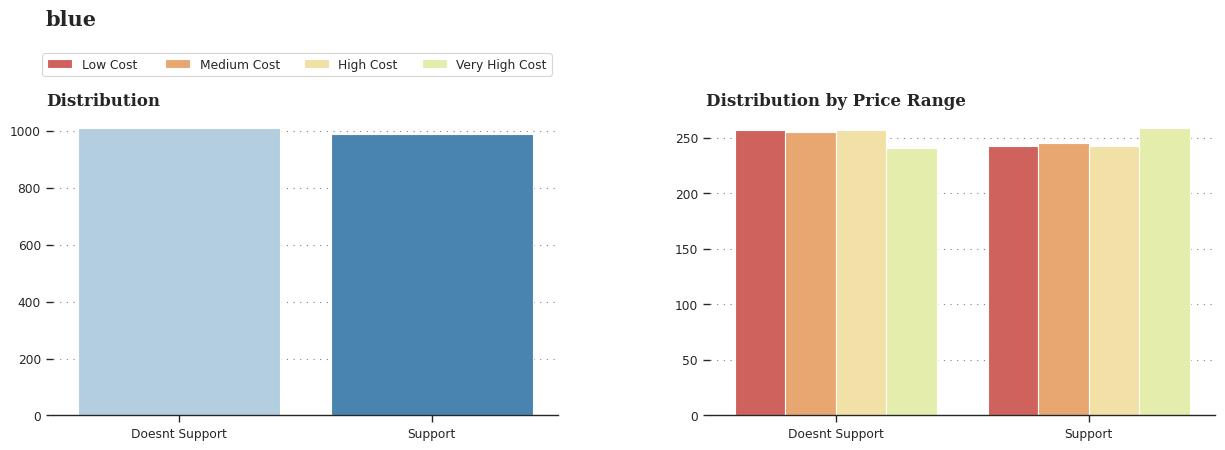

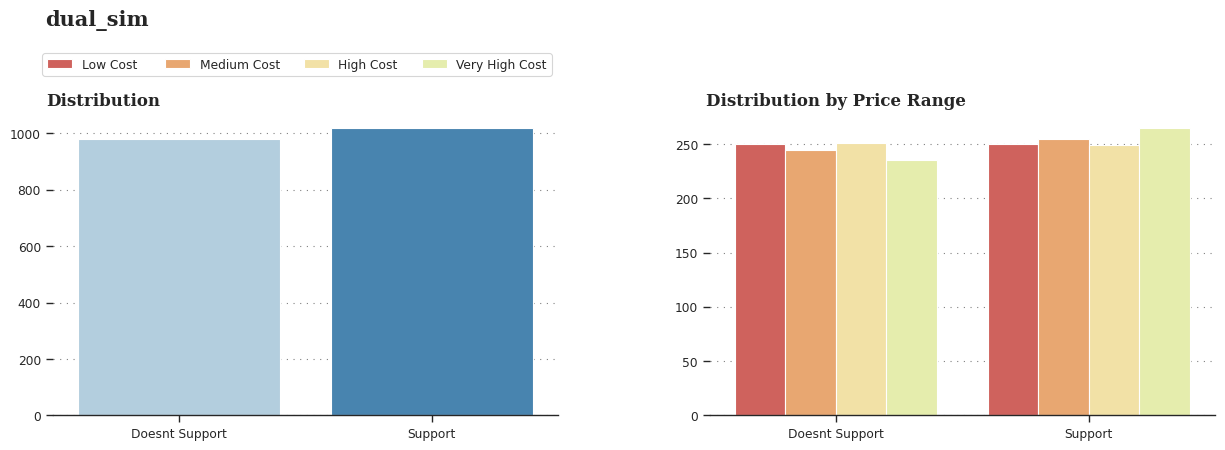

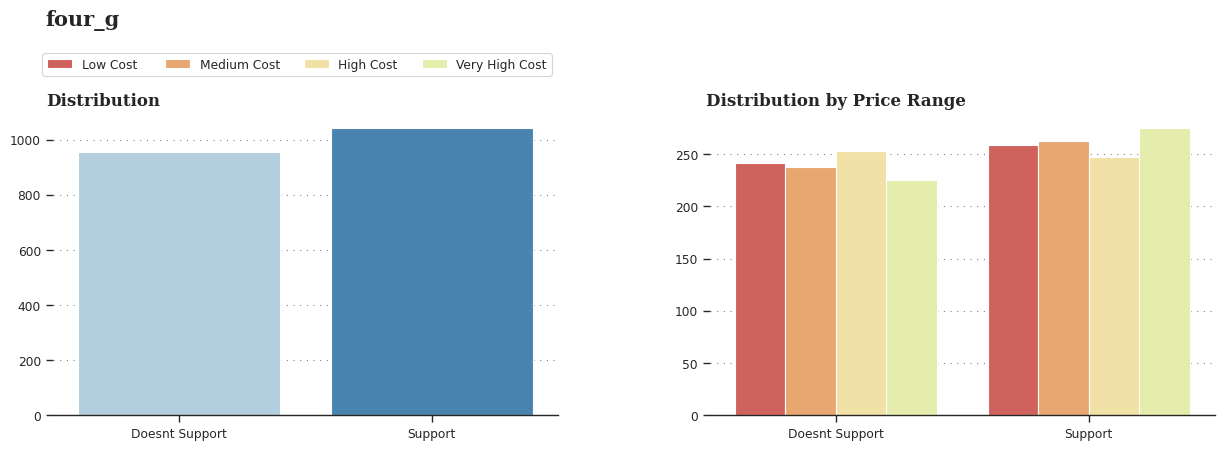

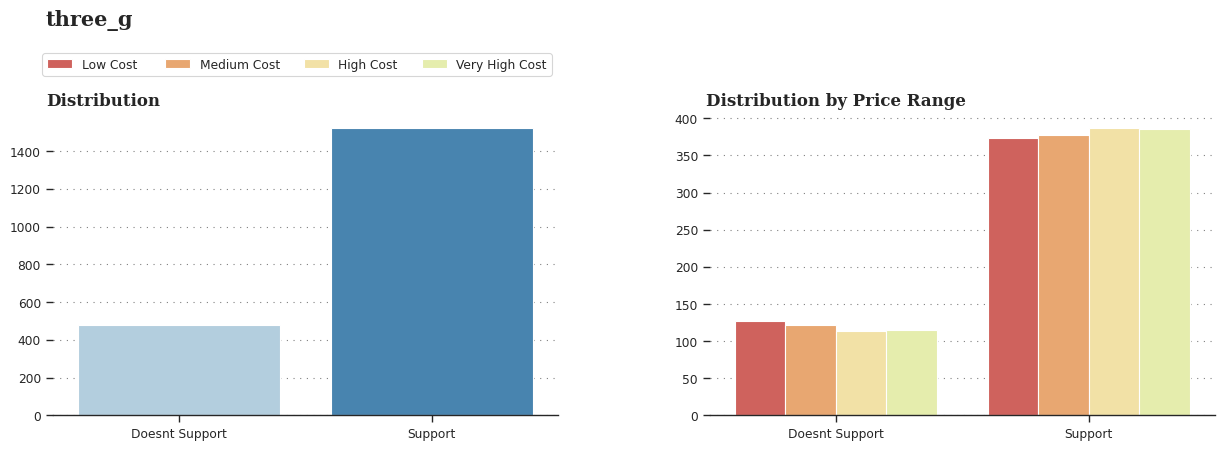

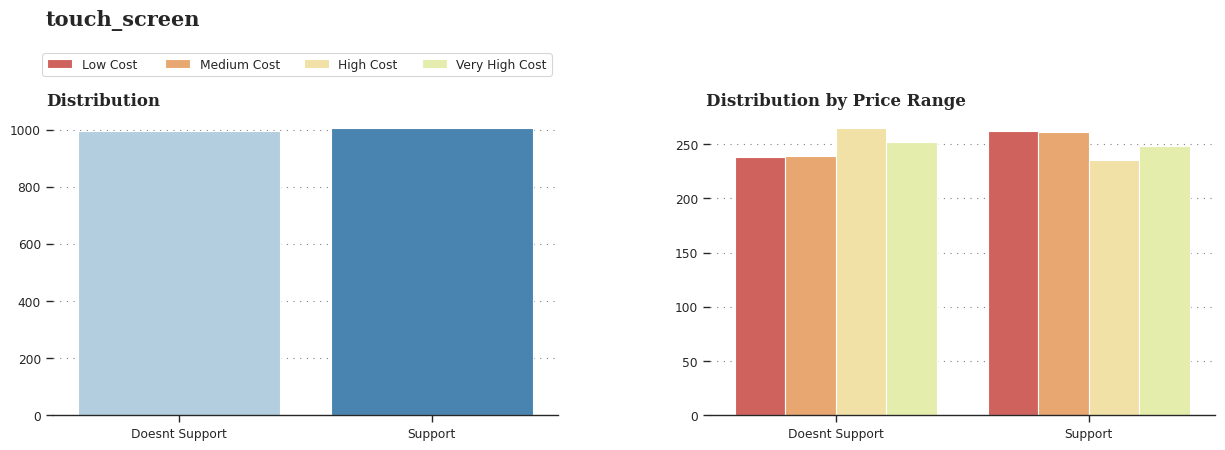

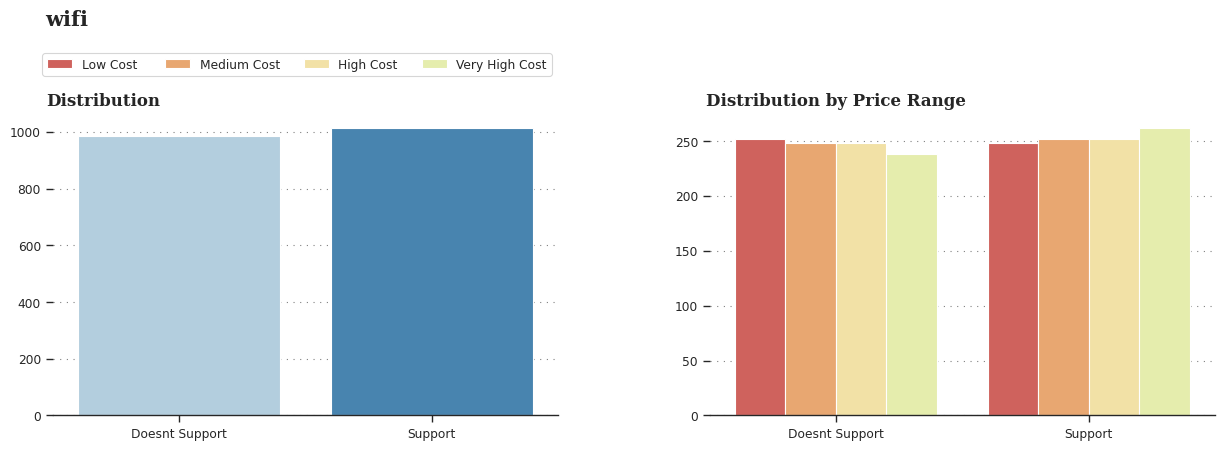

In [16]:
for i in binary_features:
  fig = plt.figure(figsize=(15,4))
  gs = fig.add_gridspec(1, 2)
  gs.update(wspace=0.3, hspace=0)
  fig.text(0.120,1.1,i, fontfamily='serif',fontsize=15, fontweight='bold')
  ax0 = fig.add_subplot(gs[0, 0])
  ax1 = fig.add_subplot(gs[0, 1])


  sns.countplot(x=i,
           data=df,
            palette='Blues',
           ax=ax0)
  ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
  ax0.spines['top'].set_visible(False)
  ax0.spines['right'].set_visible(False)
  ax0.spines['left'].set_visible(False)
  ax0.set_xticklabels(["Doesnt Support","Support"])
  ax0.set_xlabel("")
  ax0.set_ylabel("")   

  sns.countplot(x=i,
             data=df,
             hue='price_range',
             ax=ax1)
  ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
  ax1.spines['top'].set_visible(False)
  ax1.spines['right'].set_visible(False)
  ax1.spines['left'].set_visible(False)
  ax1.get_legend().remove()
  legend_labels, _= ax1.get_legend_handles_labels()
  ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
  ax1.set_xticklabels(["Doesnt Support","Support"])
  ax1.set_xlabel("")
  ax1.set_ylabel("")

  fig.show()

In [17]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10.0,19,1,1,1,0


#Jointplot for ram

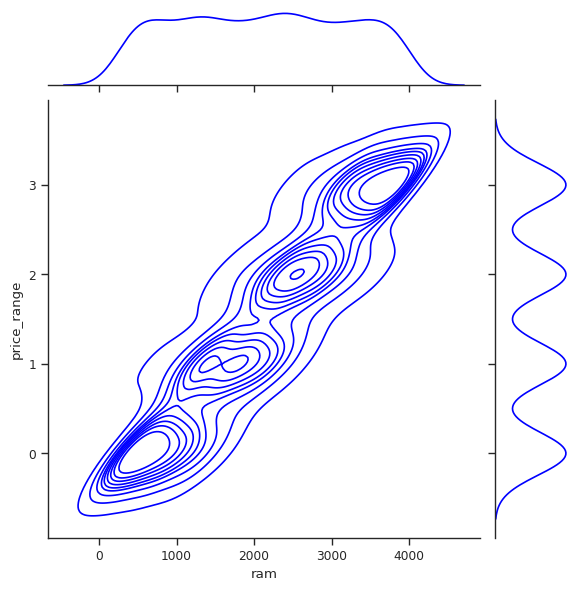

In [18]:
sns.jointplot(x='ram',y='price_range',data=df,color='blue',kind='kde')

#Chi-Square Test for Independence

In [19]:
from scipy.stats import chi2_contingency

In [20]:
catagory=['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
p_value=[]
is_significant_relationship=[]

for i in catagory:
     
    data=pd.crosstab(df[i], df['price_range'], margins=True)
    stat, p, dof, expected = chi2_contingency(data)
    p_value.append(p)
    if p<=0.05:
      is_significant_relationship.append('YES')
    else:
      is_significant_relationship.append('NO')


In [21]:
chi2_table=pd.DataFrame(list(zip(catagory,p_value,is_significant_relationship)),columns=['catagory','p_value','is_significant_relationship'])

In [22]:
chi2_table

,catagory,p_value,is_significant_relationship
0,blue,0.993778,NO
1,dual_sim,0.995712,NO
2,four_g,0.922567,NO
3,n_cores,0.941549,NO
4,three_g,0.994611,NO
5,touch_screen,0.867772,NO
6,wifi,0.999004,NO


#Train Test split

In [23]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['price_range'])],
                                                   df['price_range'],
                                                   test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(1600, 20)
(400, 20)


#Support Vector Machine Classifier

#Model Training

In [24]:
clf = svm.SVC(kernel='poly')


In [25]:
clf.fit(X_train,y_train)

SVC(kernel='poly')

In [26]:

#check training data accuracy
clf_train_pred = clf.predict(X_train)

clf_train_accuracy = accuracy_score(clf_train_pred, y_train)

In [27]:
print("Accuracy on training data:",clf_train_accuracy )

Accuracy on training data: 0.95625


In [28]:
from sklearn.metrics import classification_report
report_train=classification_report(clf_train_pred, y_train)
print(report_train)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       427
           1       0.93      0.97      0.95       392
           2       0.93      0.95      0.94       393
           3       0.97      0.96      0.96       388

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


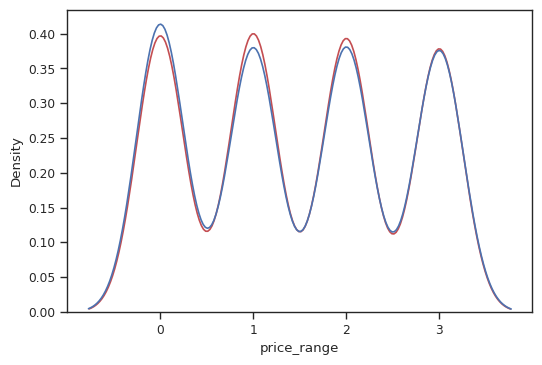

In [29]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(clf_train_pred,hist=False,color="b",ax=ax1)

#Model Testing

In [30]:
#check testing data accuracy
clf_test_pred = clf.predict(X_test)

clf_test_accuracy = accuracy_score(clf_test_pred, y_test)

In [31]:
print("Accuracy on test data:",clf_test_accuracy )

Accuracy on test data: 0.9625


In [32]:
report_test=classification_report(clf_test_pred, y_test)
print(report_test)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        98
           1       0.96      0.97      0.96        91
           2       0.92      0.96      0.94        95
           3       0.97      0.96      0.97       116

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


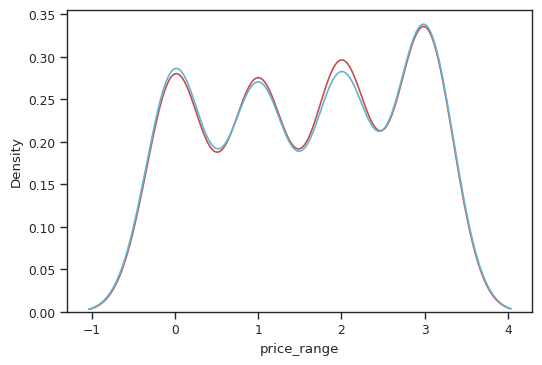

In [33]:
#plot test accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(clf_test_pred,hist=False,color="c",ax=ax1)

#Random forest Classifier

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=42, shuffle=False)


In [36]:
grid_values = {'n_estimators':[75, 80, 85, 90], 'max_depth':[7, 9, 11, 13], "max_leaf_nodes": [35, 40, 45, 50]}
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 9, 11, 13],
                         'max_leaf_nodes': [35, 40, 45, 50],
                         'n_estimators': [75, 80, 85, 90]},
             scoring='accuracy')

In [37]:
classifier.best_params_

{'max_depth': 9, 'max_leaf_nodes': 45, 'n_estimators': 85}

##Model Training

In [38]:

rf = RandomForestClassifier(max_depth=11,max_leaf_nodes= 50 ,random_state=0,n_estimators= 90)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, max_leaf_nodes=50, n_estimators=90,
                       random_state=0)

In [39]:
#check training data accuracy
rf_train_pred = rf.predict(X_train)

rf_train_accuracy = accuracy_score(rf_train_pred, y_train)

In [40]:
print("Accuracy on test data:",rf_train_accuracy )

Accuracy on test data: 0.955


In [41]:
train_report=classification_report(rf_train_pred, y_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       417
           1       0.90      0.94      0.92       392
           2       0.94      0.93      0.93       407
           3       0.99      0.99      0.99       384

    accuracy                           0.95      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.95      0.96      1600



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


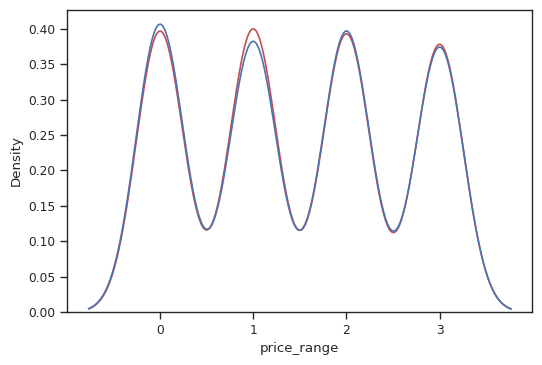

In [42]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(rf_train_pred,hist=False,color="b",ax=ax1)

##Model Testing

In [43]:
#check testing data accuracy
rf_test_pred = rf.predict(X_test)

rf_test_accuracy = accuracy_score(rf_test_pred, y_test)

In [44]:
print("Accuracy on test data:",rf_test_accuracy )

Accuracy on test data: 0.8325


In [45]:
test_report=classification_report(rf_test_pred, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        97
           1       0.80      0.76      0.78        98
           2       0.63      0.74      0.68        84
           3       0.92      0.87      0.89       121

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.84       400



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


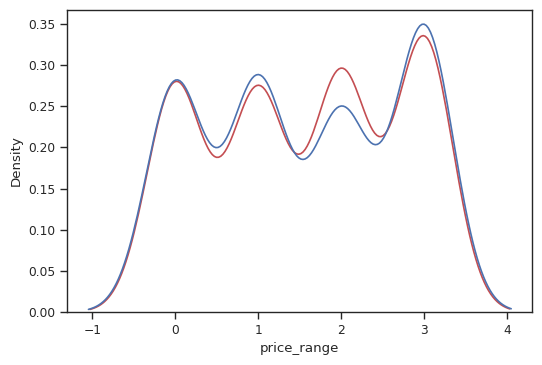

In [46]:
#plot test accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(rf_test_pred,hist=False,color="b",ax=ax1)

##Importance of features 

In [47]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


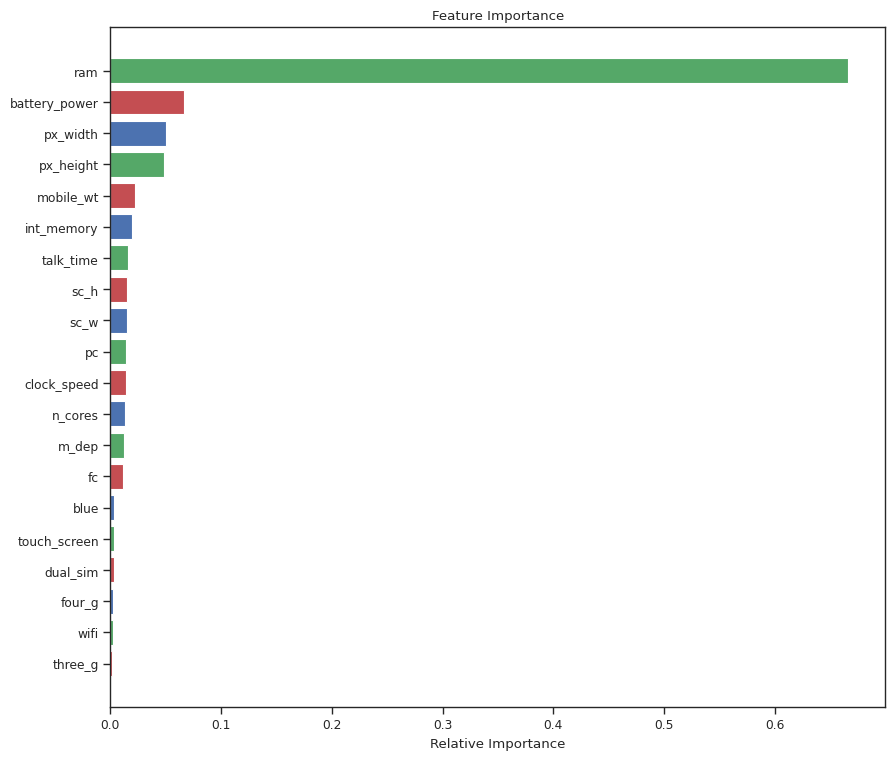

In [48]:
fig = plt.figure(figsize=(10,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='rgb', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##Random forest model with ram,battery_power,px_height,px_width,int_memory features

In [49]:
imp_fea_df=df[['ram','battery_power','px_height','px_width']]
imp_fea_df

,ram,battery_power,px_height,px_width
0,2549,842,20,756
1,2631,1021,905,1988
2,2603,563,1263,1716
3,2769,615,1216,1786
4,1411,1821,1208,1212
...,...,...,...,...
1995,668,794,1222,1890
1996,2032,1965,915,1965
1997,3057,1911,868,1632
1998,869,1512,336,670


In [50]:
x_imp= imp_fea_df
Y_imp=df['price_range']

In [51]:
#applying minmaxscaler
scaler=MinMaxScaler()
X=scaler.fit_transform(x_imp)

In [52]:
#train test split
from sklearn.model_selection import train_test_split 
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split( x_imp, Y_imp , test_size = 0.2, random_state = 0) 

##Training Model

In [53]:
rf = RandomForestClassifier(max_depth=11,max_leaf_nodes= 50 ,random_state=0,n_estimators= 90)
rf.fit(X_imp_train,y_imp_train)

RandomForestClassifier(max_depth=11, max_leaf_nodes=50, n_estimators=90,
                       random_state=0)

In [54]:
#check training data accuracy
rf_train_imp_pred = rf.predict(X_imp_train)

rf_train_imp_accuracy = accuracy_score(rf_train_imp_pred, y_imp_train)

In [55]:

print("Accuracy on test data:",rf_train_imp_accuracy )

Accuracy on test data: 0.965625


In [56]:
train_report=classification_report(rf_train_imp_pred, y_imp_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       405
           1       0.96      0.96      0.96       408
           2       0.96      0.95      0.95       404
           3       0.97      0.98      0.98       383

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



##Testing Model

In [57]:
#check testing data accuracy
rf_test_imp_pred = rf.predict(X_imp_test)

rf_test_imp_accuracy = accuracy_score(rf_test_imp_pred, y_imp_test)

In [58]:
print("Accuracy on test data:",rf_test_imp_accuracy )

Accuracy on test data: 0.9


In [59]:
test_report=classification_report(rf_test_imp_pred, y_imp_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        96
           1       0.88      0.89      0.89        91
           2       0.82      0.83      0.82        98
           3       0.92      0.91      0.92       115

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



#Logistic Regression

In [73]:
norm_df=df.copy()
norm_df=norm_df[norm_df.columns.difference(['price_range'])]


In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(norm_df)
norm_x=scaler.transform(norm_df)
norm_x

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [75]:
from sklearn.model_selection import train_test_split 
Xl_train, Xl_test, yl_train, yl_test = train_test_split(norm_x,df['price_range'],test_size=0.2,random_state=0)

In [76]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

##Model Training

In [77]:
reg.fit(Xl_train,yl_train)

LogisticRegression()

In [78]:
#check training data accuracy
reg_train_pred = reg.predict(Xl_train)

reg_train_accuracy = accuracy_score(reg_train_pred, y_train)

In [79]:
print("Accuracy on test data:",reg_train_accuracy )

Accuracy on test data: 0.945625


In [80]:
train_report=classification_report(reg_train_pred, yl_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       423
           1       0.91      0.93      0.92       399
           2       0.90      0.96      0.93       378
           3       0.99      0.96      0.97       400

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


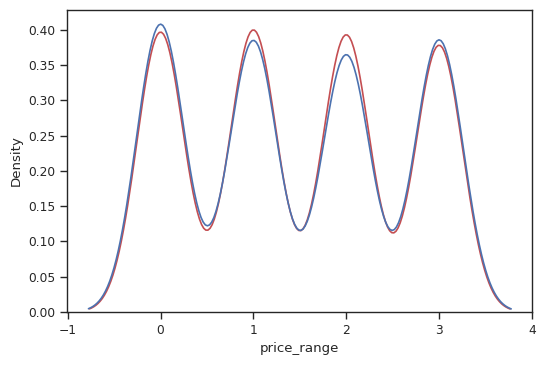

In [81]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(reg_train_pred,hist=False,color="b",ax=ax1)

##Model Testing

In [82]:
#check testing data accuracy
reg_test_pred = reg.predict(Xl_test)

reg_test_accuracy = accuracy_score(reg_test_pred, y_test)

In [83]:
print("Accuracy on test data:",reg_test_accuracy )

Accuracy on test data: 0.92


In [84]:
test_report=classification_report(reg_test_pred, yl_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        96
           1       0.86      0.89      0.87        89
           2       0.86      0.87      0.86        98
           3       0.97      0.95      0.96       117

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


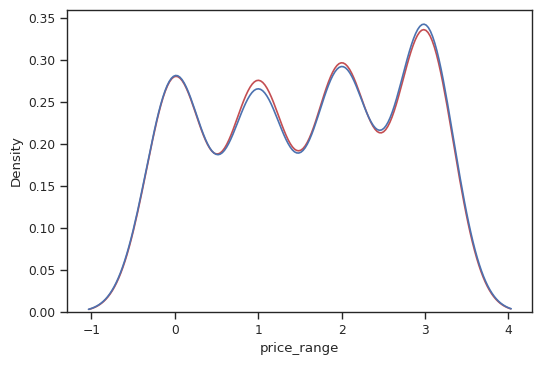

In [85]:
#plot train accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(reg_test_pred,hist=False,color="b",ax=ax1)

#Xgboost classifier

In [86]:
from xgboost import XGBClassifier
Xgbclf=XGBClassifier()


In [87]:
param={
    'learning_rate':[0.01, 0.025, 0.05, 0.75, 0.10],
    'max_depth':[3,4,5],
    'n_estimators':[25,50,75,100,150,200],
}
grid_search = GridSearchCV(Xgbclf, param,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.75, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [25, 50, 75, 100, 150, 200]})

In [88]:
grid_search.best_params_

{'learning_rate': 0.75, 'max_depth': 3, 'n_estimators': 100}

In [89]:
Xgbclf=XGBClassifier(learning_rate= 0.75,
 max_depth = 3,
 n_estimators = 100)
Xgbclf.fit(X_train, y_train)

XGBClassifier(learning_rate=0.75, objective='multi:softprob')

##Model Training

In [90]:
#check training data accuracy
xg_train_pred = Xgbclf.predict(X_train)

xg_train_accuracy = accuracy_score(xg_train_pred, y_train)

In [ ]:
print("Accuracy on test data:",xg_train_accuracy )

Accuracy on test data: 1.0


In [91]:
train_report=classification_report(xg_train_pred, y_train)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


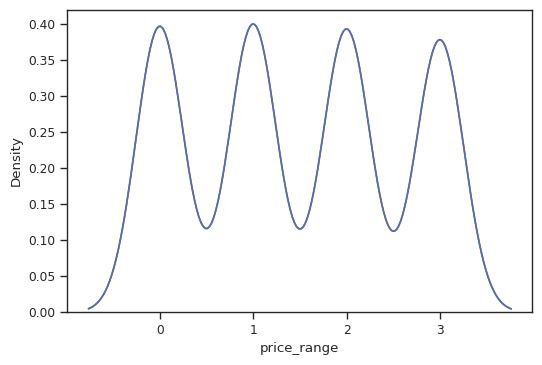

In [92]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(xg_train_pred,hist=False,color="b",ax=ax1)

##Model Testing

In [93]:
#check testing data accuracy
xg_test_pred = Xgbclf.predict(X_test)

xg_test_accuracy = accuracy_score(xg_test_pred, y_test)

In [94]:
print("Accuracy on test data:",xg_test_accuracy )

Accuracy on test data: 0.9275


In [95]:
test_report=classification_report(xg_test_pred, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.90      0.93      0.92        89
           2       0.87      0.89      0.88        97
           3       0.95      0.93      0.94       116

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


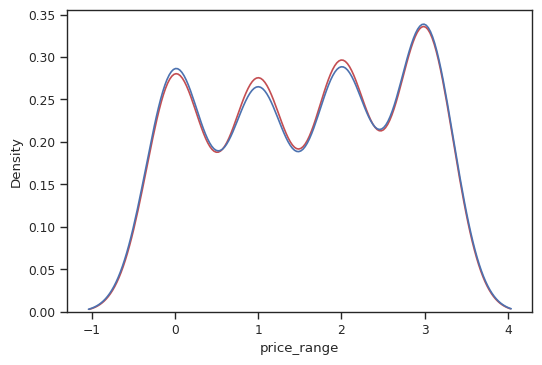

In [96]:
#plot train accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(xg_test_pred,hist=False,color="b",ax=ax1)

In [97]:
features = X_train.columns
importances = Xgbclf.feature_importances_
indices = np.argsort(importances)

In [98]:
from xgboost import plot_importance

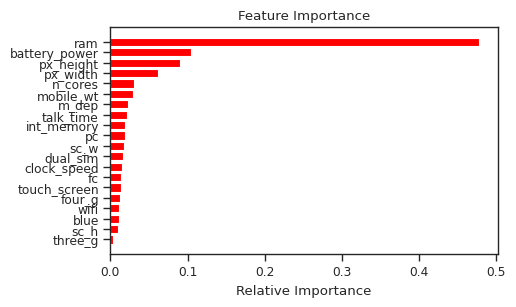

In [99]:
fig = plt.figure(figsize=(5,3))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#Conclusion:-

1.we achieve almost same accuracy using all features and using some importatnt features hence we can say that The main features that drive the mobile bphone price is ram,battery_power,pixel dimensions,int_memory. 

3.We achieve 96% of accuracy on test data using SVM.it was concluded that the Logistic regression model was the best among all.